In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 이미지 분석을 위한 minst 데이터 불러오기 
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

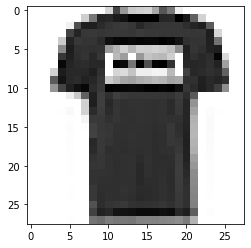

In [5]:
plt.imshow(train_input[1].reshape(28,28), cmap='gray_r')
plt.show()

In [6]:
# 전처리 및 데이터 분할
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
# 신경망을 구성하는 방법1
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 신경망을 구성하는 방법2 
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid',input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax',name='output')]
            , name = '패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 신경망을 구성하는 방법3
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 신경망을 구성하는 방법4
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* 패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 
* 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼쳐야 함
* Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할`

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
# 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples


2021-12-03 12:44:28.076931: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA


Epoch 1/5
48000/48000 [==============================] - 9s 196us/sample - loss: 0.5313 - acc: 0.8113
Epoch 2/5
48000/48000 [==============================] - 8s 169us/sample - loss: 0.3923 - acc: 0.8587
Epoch 3/5
48000/48000 [==============================] - 8s 161us/sample - loss: 0.3532 - acc: 0.8733
Epoch 4/5
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3321 - acc: 0.8804
Epoch 5/5
48000/48000 [==============================] - 9s 178us/sample - loss: 0.3172 - acc: 0.8867


In [13]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 77us/sample - loss: 0.3557 - acc: 0.8827


[0.35565291571617125, 0.88275]

### 하이퍼 파라미터
* 하이퍼 파라미터는 모델 학습시 사람이 지정해주어야 하는 파라미터
    + 신경망 층수, 학습률, 다양한 알고리즘,
* 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼 파라미터 

In [14]:
# 경사하강법 : sgd
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# 학습률 기본값은 0.01 
# 학습률 수정 0.1 
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.7997 - acc: 0.7423
Epoch 2/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.5364 - acc: 0.8192
Epoch 3/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.4880 - acc: 0.8335
Epoch 4/5
48000/48000 [==============================] - 6s 120us/sample - loss: 0.4610 - acc: 0.8398
Epoch 5/5
48000/48000 [==============================] - 6s 126us/sample - loss: 0.4430 - acc: 0.8464


In [15]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 82us/sample - loss: 0.4490 - acc: 0.8420


[0.4490233444770177, 0.842]

In [16]:
# 아다그라드
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 147us/sample - loss: 1.2129 - acc: 0.6452
Epoch 2/5
48000/48000 [==============================] - 7s 141us/sample - loss: 0.8024 - acc: 0.7379
Epoch 3/5
48000/48000 [==============================] - 7s 141us/sample - loss: 0.7127 - acc: 0.7695
Epoch 4/5
48000/48000 [==============================] - 7s 139us/sample - loss: 0.6645 - acc: 0.7856
Epoch 5/5
48000/48000 [==============================] - 7s 136us/sample - loss: 0.6324 - acc: 0.7959


In [17]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 95us/sample - loss: 0.6355 - acc: 0.7883


[0.6354784053961436, 0.78833336]

In [18]:
# 아담
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 156us/sample - loss: 0.5236 - acc: 0.8172
Epoch 2/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.3982 - acc: 0.8583
Epoch 3/5
48000/48000 [==============================] - 7s 156us/sample - loss: 0.3547 - acc: 0.8724
Epoch 4/5
48000/48000 [==============================] - 8s 167us/sample - loss: 0.3273 - acc: 0.8815
Epoch 5/5
48000/48000 [==============================] - 7s 152us/sample - loss: 0.3044 - acc: 0.8892


### drop_out
* 드롭아웃은 딥러닝의 아버지로 불리는 제프리 힌턴이 소개
* 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
* 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있음

In [19]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [21]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 77us/sample - loss: 0.3916 - acc: 0.8679


[0.3916153056422869, 0.86791664]

### 손실과 정확도 그래프

In [22]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) 

In [23]:
# loss, acc 를 dict형태로 저장 
history.history.keys()

dict_keys(['loss', 'acc'])

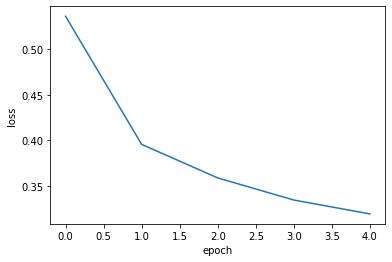

In [24]:
# 훈련된 모델의 손실 변화 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

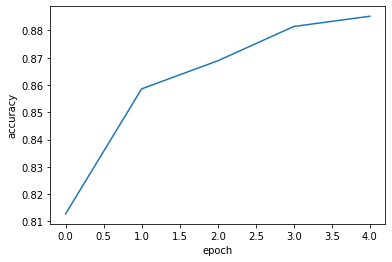

In [25]:
# 훈련돤 모델의 정확도 변화 시각화
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [34]:
# 에포크에 따른 과대적합과 과소적합을 파악하려면 
# 훈련 세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [35]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

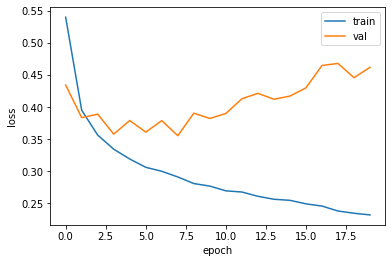

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 훈련시 오차와 테스트시 오차의 차이가 큼
# => 하이퍼 파라미터 적용

In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

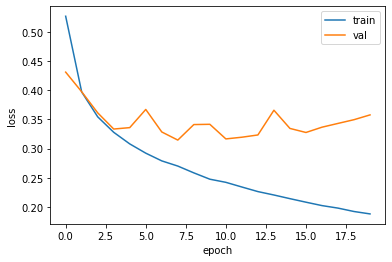

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

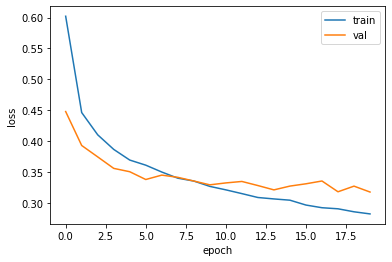

In [41]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# epoch 7 이전까지 훈련시 오차보다 테스트시 오차가 더 작음
# 이 지점 이후로는 훈련할 필요가 없어보임

### 훈련 조기종료early stopping
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만다는 모델을 저장
* EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음

In [45]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련시 가장 적은 오차를 지닌 모델을 파일로 저장 
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-model.h5')
# 훈련시 가장 적은 오차를 기준으로 오차가 다시 상승하면 훈련을 중지
# patience : 오차 증가 요인 횟수 지정 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 위에서 정의한 ModelCheckpoint와 early_stopping을
# callbacks 속성에 리스트로 저장함
history= model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [47]:
# 중지 시점 에포크 출력
early_stopping_cb.stopped_epoch

7

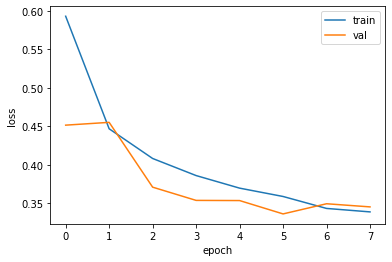

In [48]:
# 그래트 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()